# Mini Project


### Import necessary libraries

In [2]:
# Essential Libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# 3D Plotting
from mpl_toolkits.mplot3d import Axes3D

# Sklearn Preprocessing & Model Selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

# Sklearn Metrics
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score, recall_score, 
    f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# XGBoost
import xgboost as xgb

# Miscellaneous
import warnings
warnings.simplefilter("ignore")


In [3]:
%matplotlib inline

# Data Description 

The dataset used in this analysis is the **Behavioral Risk Factor Surveillance System (BRFSS)** dataset. It consists of **319,795 rows and 18 columns**. The goal is to explore the data, understand factors contributing to heart disease, and build a predictive model.

The dataset contains the following features:

- **HeartDisease**: Indicates whether the person has heart disease (Yes/No).
- **BMI**: Body Mass Index of the individual.
- **Smoking**: Whether the individual is a smoker (Yes/No).
- **AlcoholDrinking**: Indicates excessive alcohol consumption (Yes/No).
- **Stroke**: Whether the individual has experienced a stroke (Yes/No).
- **PhysicalHealth**: Number of physically unhealthy days in the past 30 days.
- **MentalHealth**: Number of mentally unhealthy days in the past 30 days.
- **DiffWalking**: Indicates difficulty walking or climbing stairs (Yes/No).
- **Sex**: Gender of the individual.
- **AgeCategory**: Age group category (e.g., 35-44, 45-54, etc.).
- **Race**: Race or ethnicity of the individual.
- **Diabetic**: Indicates whether the person has diabetes (Yes/No).
- **PhysicalActivity**: Engagement in physical activity in the past 30 days (Yes/No).
- **GenHealth**: Self-reported general health status (Excellent, Very Good, Good, Fair, or Poor).
- **SleepTime**: Average hours of sleep per day.
- **Asthma**: Indicates whether the individual has asthma (Yes/No).
- **KidneyDisease**: Indicates kidney disease (Yes/No).
- **SkinCancer**: Indicates skin cancer diagnosis (Yes/No).


In [4]:
df = pd.read_csv('heart_2022_no_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


### Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

### EDA&INSIGHTS

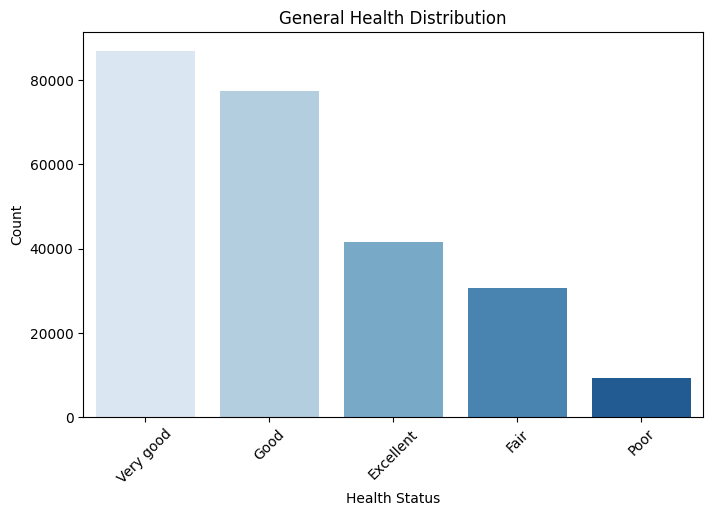

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['GeneralHealth'], order=df['GeneralHealth'].value_counts().index, palette='Blues')
plt.title('General Health Distribution')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Insight: Most people may classify their health as "Good" or "Fair."

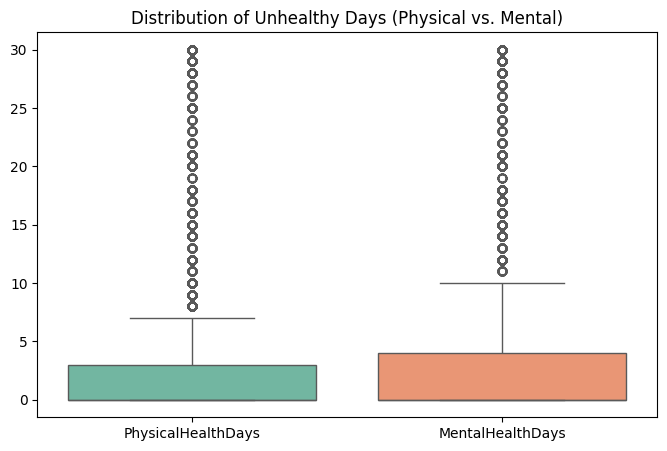

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['PhysicalHealthDays', 'MentalHealthDays']], palette="Set2")
plt.title("Distribution of Unhealthy Days (Physical vs. Mental)")
plt.show()
#Insight: The number of unhealthy days for physical health is higher than mental health.

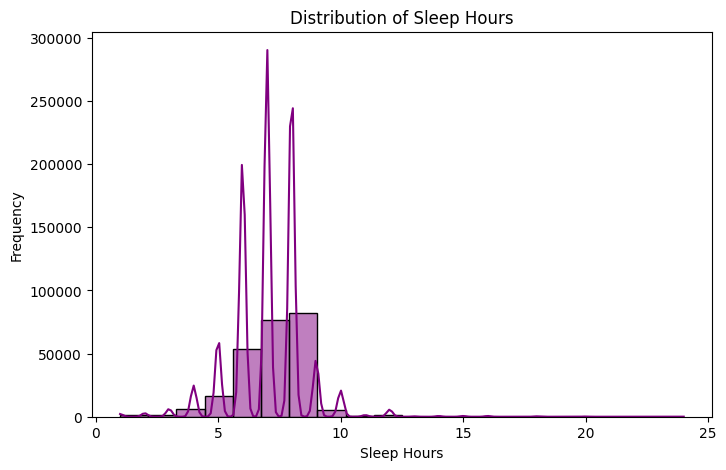

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['SleepHours'], bins=20, kde=True, color="purple")
plt.title("Distribution of Sleep Hours")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.show()
#Insight: Most people sleep between 6-8 hours.

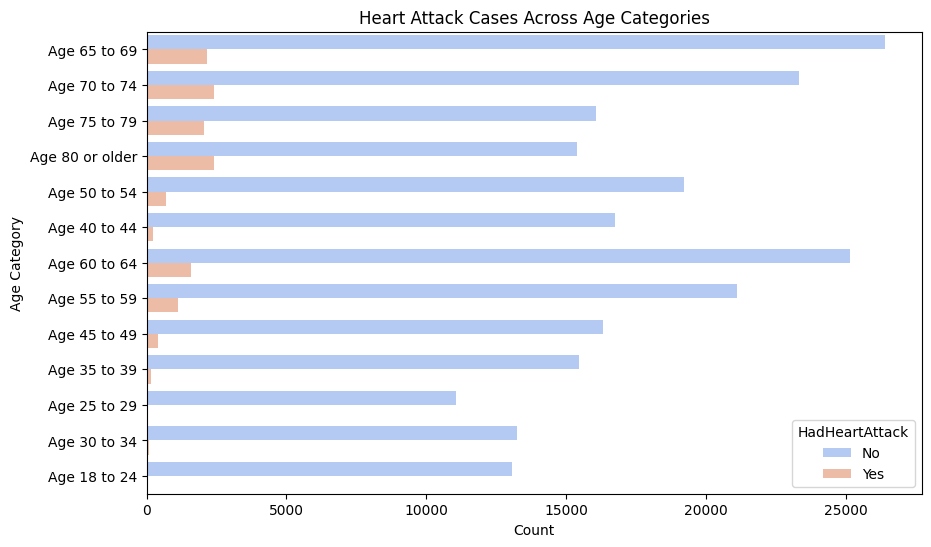

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['AgeCategory'], hue=df['HadHeartAttack'], palette='coolwarm')
plt.title('Heart Attack Cases Across Age Categories')
plt.xlabel('Count')
plt.ylabel('Age Category')
plt.show()
#Insight: The age category of 65+ has the highest number of heart attack cases.

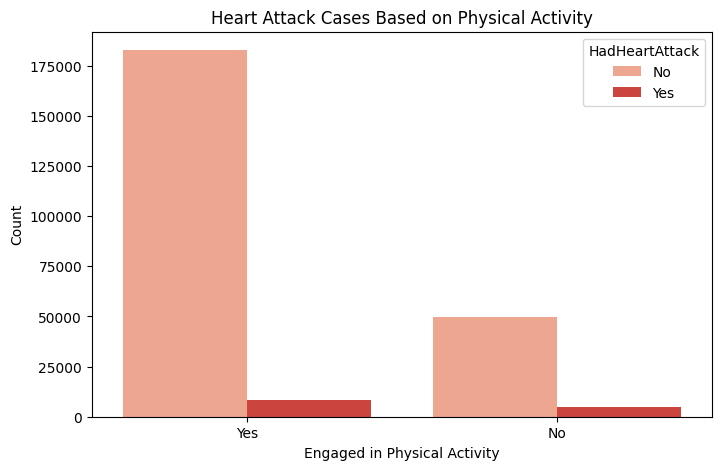

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['PhysicalActivities'], hue=df['HadHeartAttack'], palette='Reds')
plt.title('Heart Attack Cases Based on Physical Activity')
plt.xlabel('Engaged in Physical Activity')
plt.ylabel('Count')
plt.show()
#Insight: People who did not engage in physical activity had more heart attack cases.

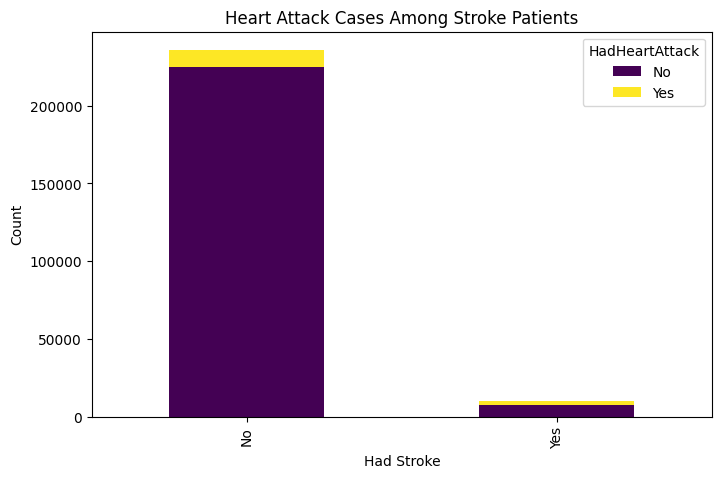

In [13]:
pd.crosstab(df['HadStroke'], df['HadHeartAttack']).plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,5))
plt.title('Heart Attack Cases Among Stroke Patients')
plt.xlabel('Had Stroke')
plt.ylabel('Count')
plt.show()
#Insight: People who had a stroke also had a heart attack.

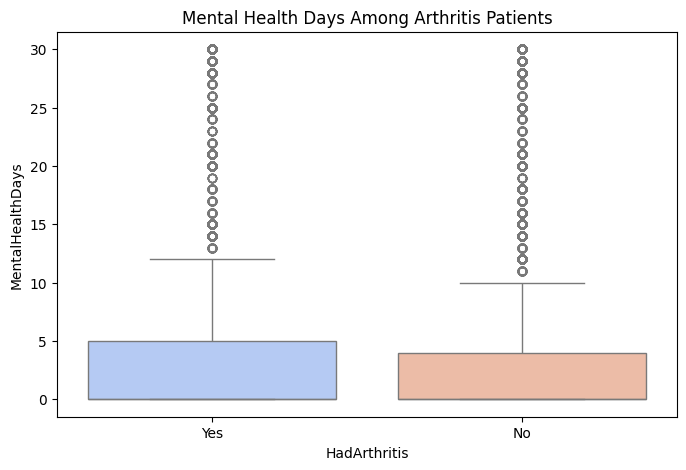

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['HadArthritis'], y=df['MentalHealthDays'], palette="coolwarm")
plt.title("Mental Health Days Among Arthritis Patients")
plt.show()
#Insight: People with arthritis have more mental health days.

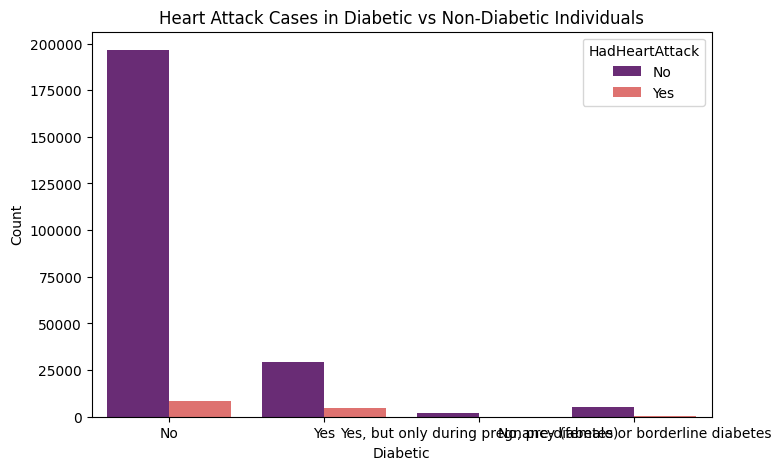

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['HadDiabetes'], hue=df['HadHeartAttack'], palette='magma')
plt.title('Heart Attack Cases in Diabetic vs Non-Diabetic Individuals')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()
#Insight: Diabetic individuals have more heart attack cases.

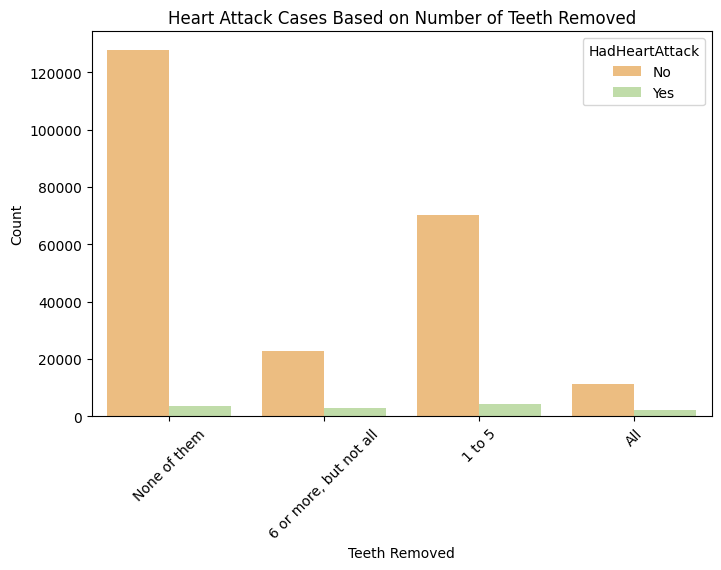

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['RemovedTeeth'], hue=df['HadHeartAttack'], palette='Spectral')
plt.title('Heart Attack Cases Based on Number of Teeth Removed')
plt.xlabel('Teeth Removed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Insight: People who have had more teeth removed have more heart attack cases.


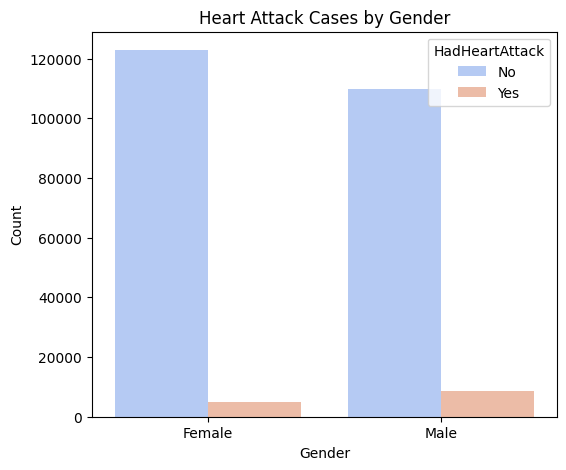

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['Sex'], hue=df['HadHeartAttack'], palette='coolwarm')
plt.title('Heart Attack Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
#Insight: Males have more heart attack cases than females.

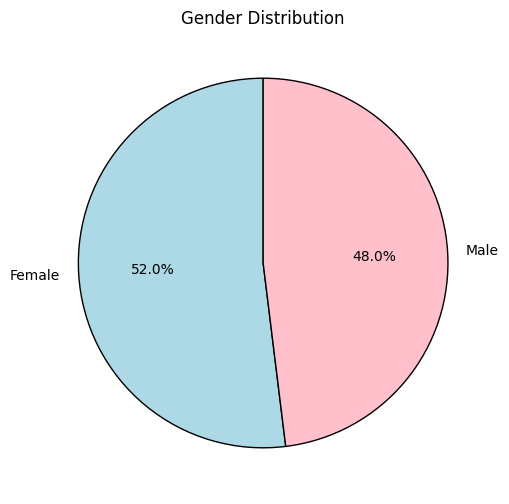

In [18]:
plt.figure(figsize=(6,6))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution')
plt.ylabel('')  # Hide y-label for better visualization
plt.show()
#Insight: This pie chart will show the percentage of male vs female participants in your dataset.

### Encoding Categorical Columns

In [8]:
le = LabelEncoder()

In [9]:
categorical_columns=df.select_dtypes(include='object').columns

In [10]:
categorical_columns

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [11]:
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])

In [12]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


### Balance Data

In [13]:
x=df.drop(columns=['HadHeartAttack'])
y=df['HadHeartAttack']

### Spliting

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Modeling

In [15]:
def evaluate_model(model,pred):
    
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

#### LogisticRegression

In [16]:
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)


Accuracy Train Score : 0.9479243940856664

Accuracy Test Score : 0.9490681462512448

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46558
           1       0.56      0.25      0.34      2645

    accuracy                           0.95     49203
   macro avg       0.76      0.62      0.66     49203
weighted avg       0.94      0.95      0.94     49203




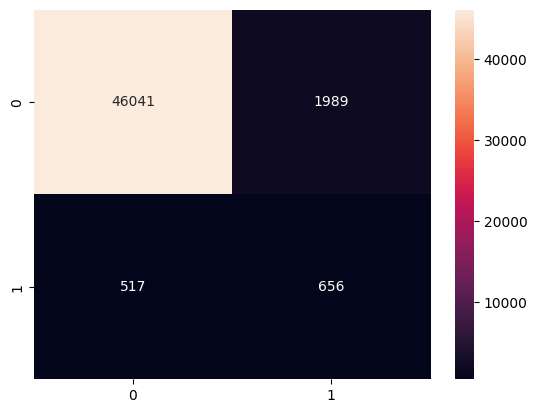

In [17]:
evaluate_model(lr,y_pred_lr)

#### RandomForestClassifier

In [18]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)


Accuracy Train Score : 0.9999491895737005

Accuracy Test Score : 0.9486210190435542

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46558
           1       0.57      0.18      0.27      2645

    accuracy                           0.95     49203
   macro avg       0.76      0.58      0.62     49203
weighted avg       0.93      0.95      0.94     49203




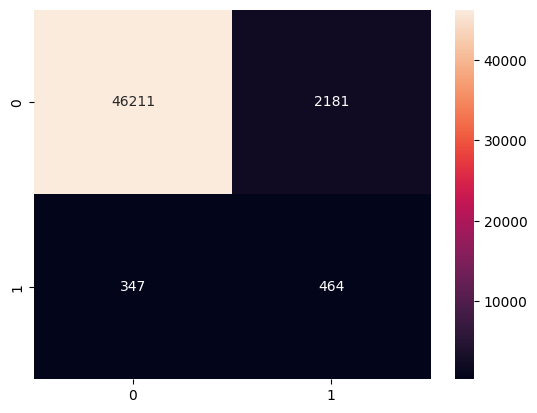

In [19]:
evaluate_model(rf,y_pred_rf)

#### KNN

Accuracy Train Score : 0.9475026675473808

Accuracy Test Score : 0.9438652114708452

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46558
           1       0.26      0.02      0.04      2645

    accuracy                           0.94     49203
   macro avg       0.60      0.51      0.51     49203
weighted avg       0.91      0.94      0.92     49203




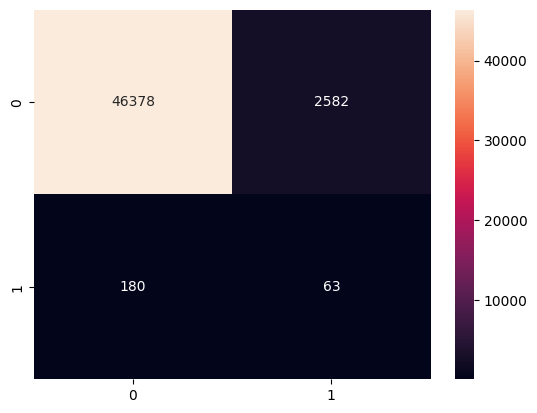

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
evaluate_model(knn, y_pred_knn)

#### Naive Bayes

Accuracy Train Score : 0.8389970021848483

Accuracy Test Score : 0.8388512895555149

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     46558
           1       0.21      0.70      0.32      2645

    accuracy                           0.84     49203
   macro avg       0.59      0.78      0.61     49203
weighted avg       0.94      0.84      0.88     49203




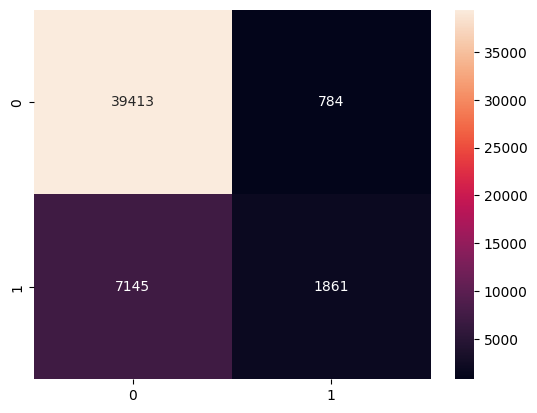

In [21]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb = GaussianNB()

# Fit the model
nb.fit(x_train, y_train)

# Predict the target variable
y_pred_nb = nb.predict(x_test)

# Evaluate the model
evaluate_model(nb, y_pred_nb)

### Decision Tree

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9122411235087291

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     46558
           1       0.24      0.30      0.27      2645

    accuracy                           0.91     49203
   macro avg       0.60      0.62      0.61     49203
weighted avg       0.92      0.91      0.92     49203




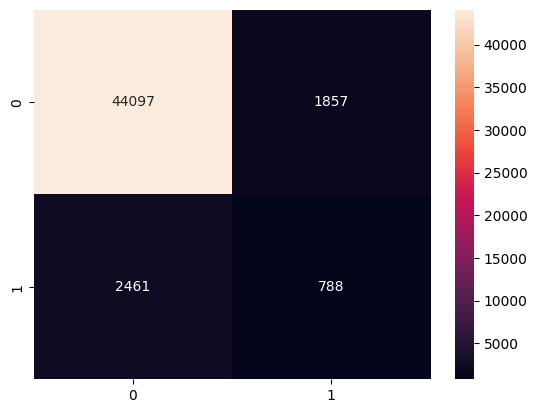

In [22]:
# Initialize the model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(x_train, y_train)

# Predict the target variable
y_pred_dt = dt.predict(x_test)

# Evaluate the model
evaluate_model(dt, y_pred_dt)

#### XGBoost

In [23]:
# Initialize the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(x_train, y_train)

# Predict the target variable
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model


Accuracy Train Score : 0.9591687414257406

Accuracy Test Score : 0.9478893563400606

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46558
           1       0.53      0.24      0.33      2645

    accuracy                           0.95     49203
   macro avg       0.75      0.62      0.65     49203
weighted avg       0.94      0.95      0.94     49203




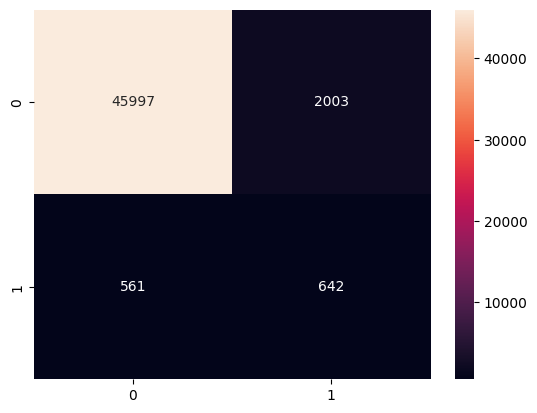

In [24]:
evaluate_model(xgb_model, y_pred_xgb)

#### ANN

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
ann = Sequential()

# Adding the input layer and the first hidden layer
ann.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))

# Adding the second hidden layer
ann.add(Dense(units=16, activation='relu'))

# Adding the output layer
ann.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the ANN on the Training set
ann.fit(x_train, y_train, batch_size=32, epochs=50)
loss, accuracy = ann.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)


Epoch 1/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9330 - loss: 0.2579
Epoch 2/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9468 - loss: 0.1540
Epoch 3/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9475 - loss: 0.1512
Epoch 4/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9480 - loss: 0.1471
Epoch 5/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9470 - loss: 0.1500
Epoch 6/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.9478 - loss: 0.1476
Epoch 7/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.9482 - loss: 0.1460
Epoch 8/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9486 - loss: 0.1458
Epoch 9/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9477 - loss: 0.1476
Epoch 10/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9477 - loss: 0.1459
Epoch 11/50
6151/6151 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9479 - loss: 0.1458
Epoch 12/50
6151/61

In [26]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "K-Nearest Neighbors": knn,
    "Naive Bayes": nb,
    "Decision Tree": dt,
    "XGBoost": xgb_model,
    "ANN": ann
}

for name, model in models.items():
    if name == "ANN":
        _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    else:
        accuracy = model.score(x_test, y_test)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9491
Random Forest Accuracy: 0.9486
K-Nearest Neighbors Accuracy: 0.9439
Naive Bayes Accuracy: 0.8389
Decision Tree Accuracy: 0.9122
XGBoost Accuracy: 0.9479
ANN Accuracy: 0.9494


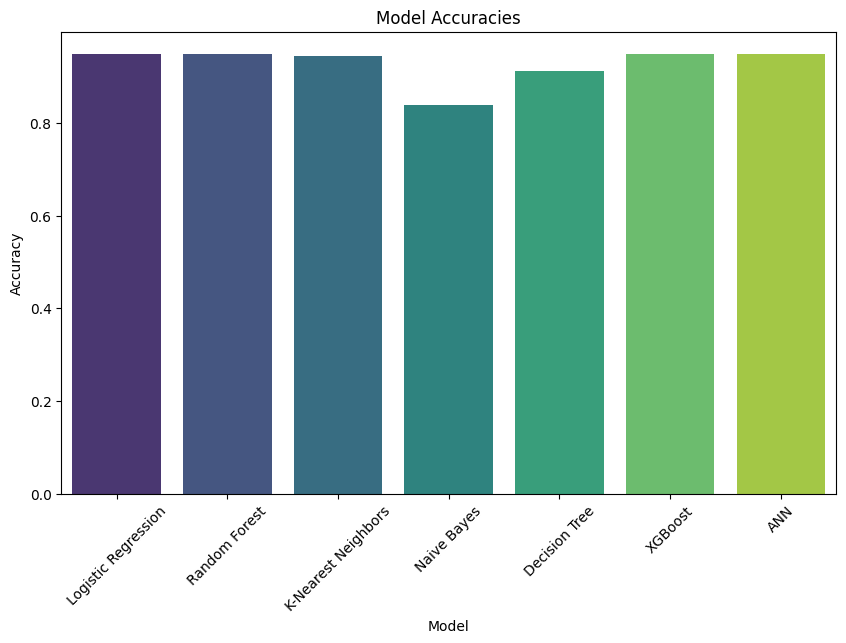

In [27]:
# Extract model names and their accuracies
model_names = list(models.keys())
accuracies = []

for name, model in models.items():
    if name == "ANN":
        _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    else:
        accuracy = model.score(x_test, y_test)
    accuracies.append(accuracy)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [28]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Random Forest model saved to random_forest_model.pkl")

Random Forest model saved to random_forest_model.pkl


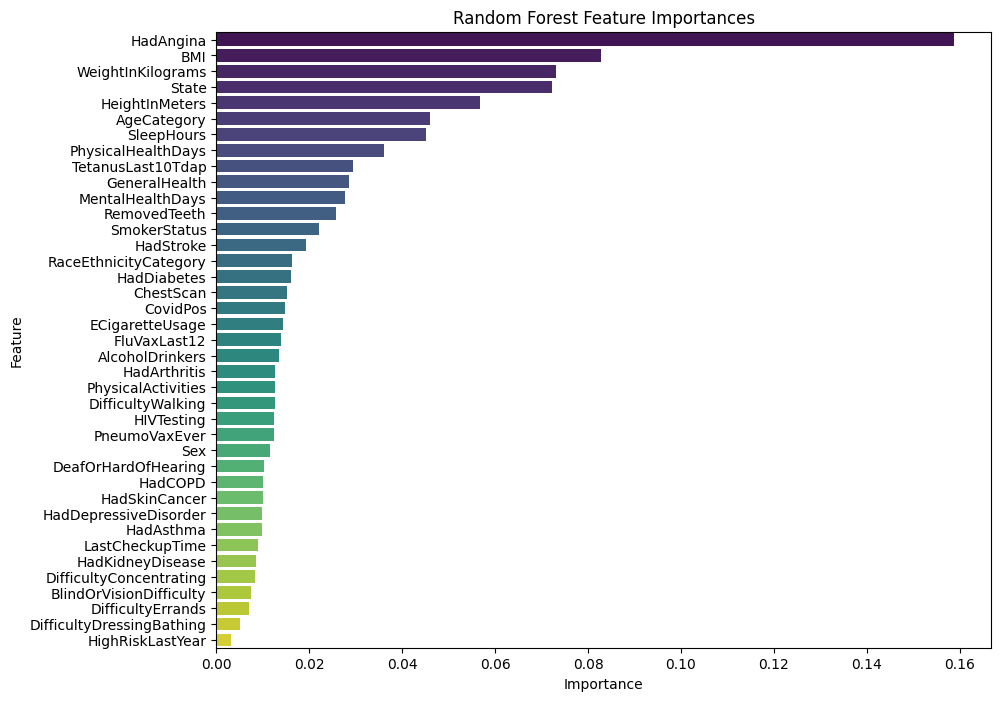

In [29]:
# Extract feature importances
importances = rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()